<a href="https://colab.research.google.com/github/CatMahm/Csolkovits_HW2_CSC302_Group5/blob/main/csolkovits_Copy_of_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please see examples we did in class. Questions are just variations of what we did earlier.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Q1**. Please read WorldCupMatches.csv to a data frame to proceed

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read WorldCupMatches.csv to df
df = pd.read_csv('/content/drive/MyDrive/DATA/WorldCupMatches.csv')
print(df.head())
df.shape
print(df['Year'].unique())
print(list(df.columns))

   Year              Datetime    Stage         Stadium         City  \
0  1930  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France                4                1         Mexico   
1            USA                3                0        Belgium   
2     Yugoslavia                2                1         Brazil   
3        Romania                3                1           Peru   
4      Argentina                1                0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0                     3                     0   
1     

**Q2** Using seaborn's displot draw density curves to show the distributions of Home Team Goals for every year.

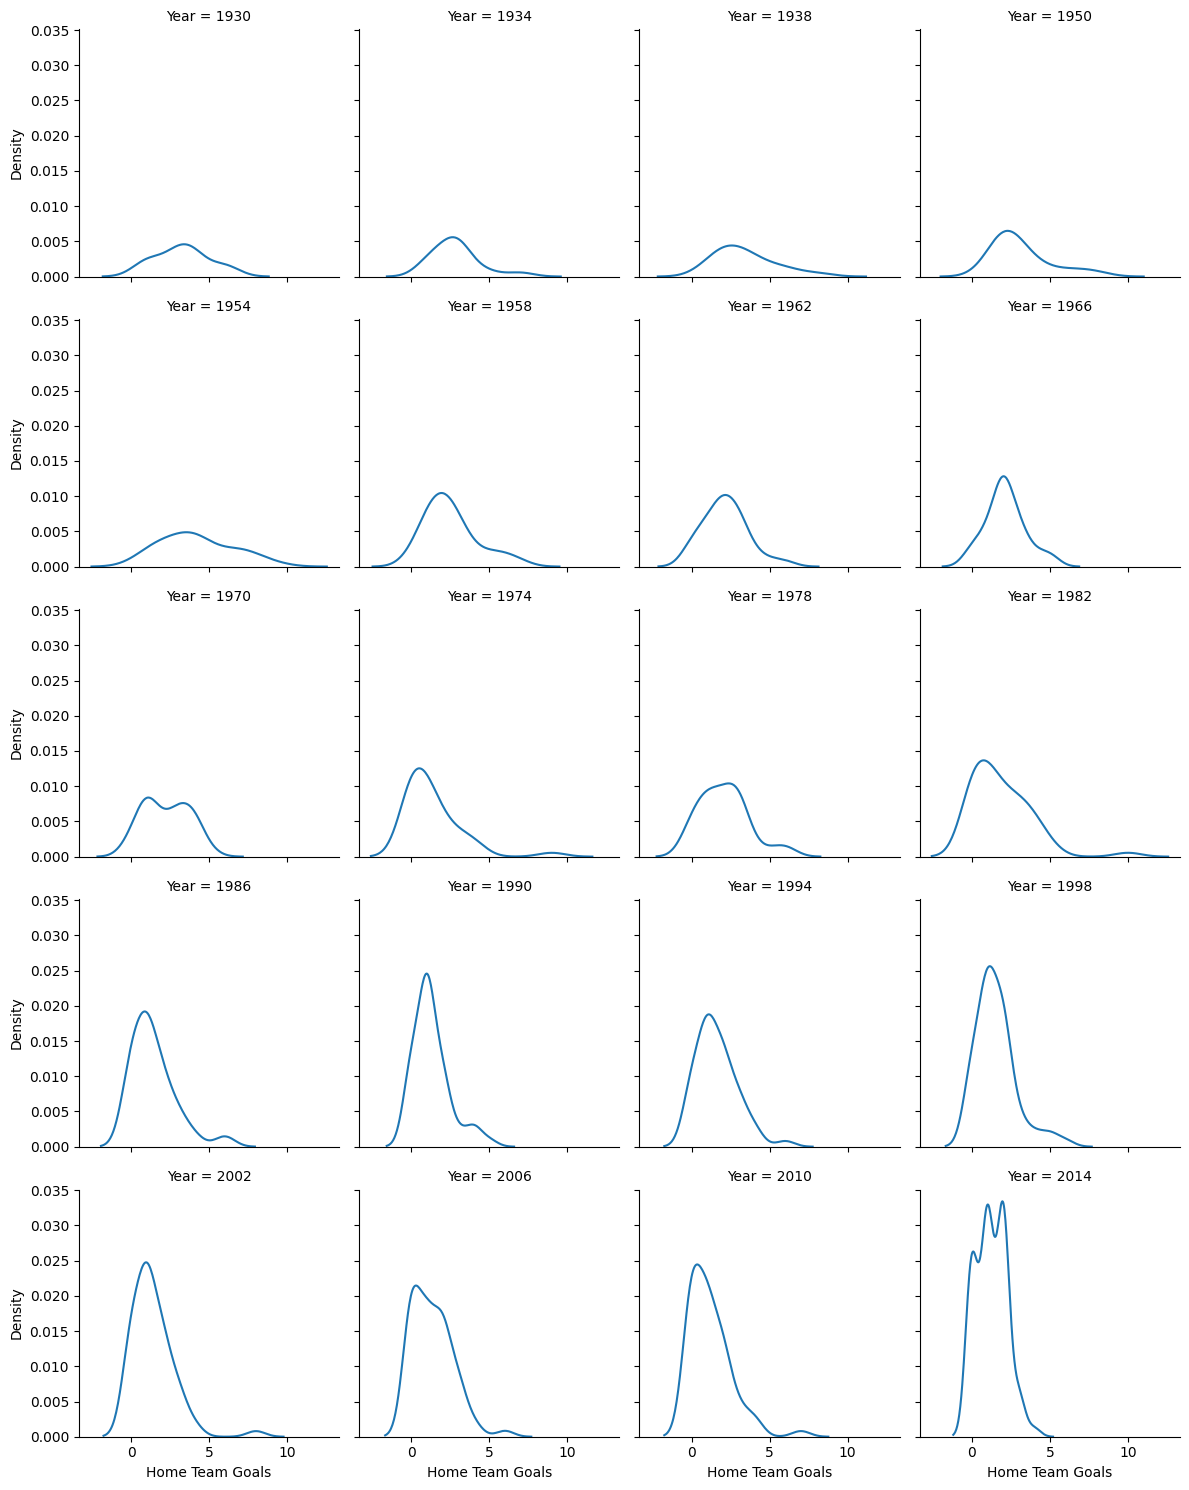

In [3]:
#Using seaborn's displot draw density curves to show the distributions of Home Team Goals for every year.
sns.displot(data = df, x = "Home Team Goals", col = "Year", kind = "kde", col_wrap=4, height=3, aspect=1)

Text(0.5, 1.0, 'Density Curves for Home Team Goals')

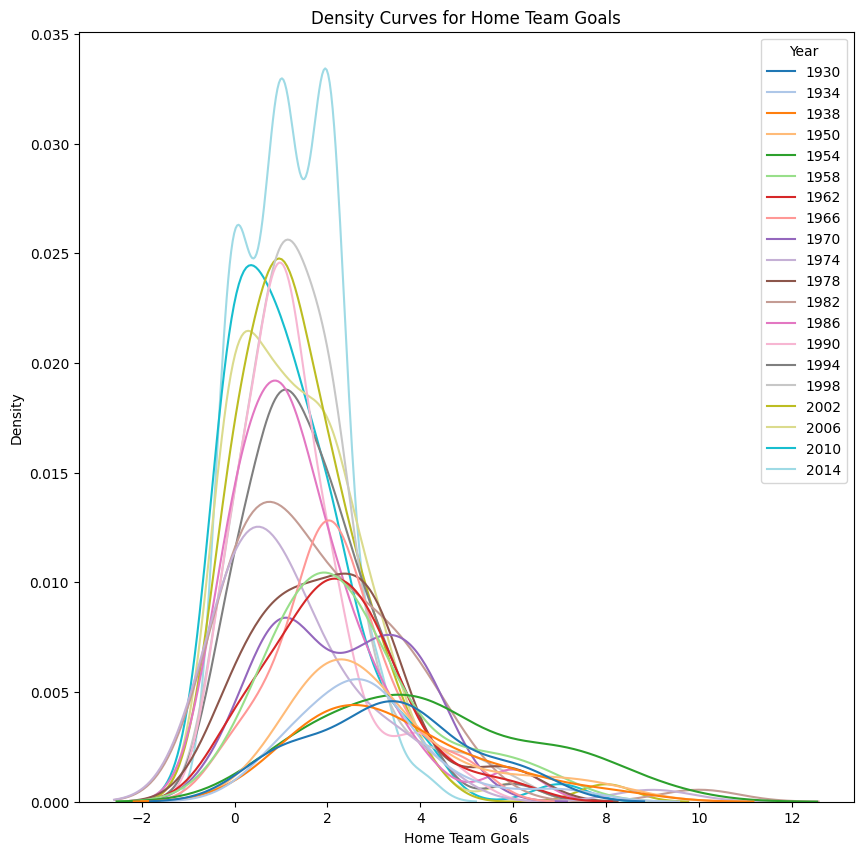

In [4]:
#Using seaborn's displot draw density curves to show the distributions of Home Team Goals for every year.
#Using kdeplot to overlay them to see how it looks

#figure(): function that accepts arguments (such as figsize) to adjust size/resolution of plot.
#plt.figure() creates a new plot
#Did this to make sure everything can be seen

plt.figure(figsize=(10,10))

#Density Curves on a single plot with a different color for each year with tab20
sns.kdeplot(data=df, x="Home Team Goals", hue="Year", palette="tab20")

plt.title("Density Curves for Home Team Goals")

**Q3** Draw violin plots to summarize Home Team Goals distributions for each year by using seaborn. Notice that labels are really cluttered. Then please refer to the earlier notebooks to have labels to appear on only select years which end with 0. You can use ax handle to call ax.set_xticklables(labels) for the labels your prepared.

<ipython-input-5-aacd78017101>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


Text(0.5, 1.0, 'Home Team Goals Distribution (Years 1930-2014)')

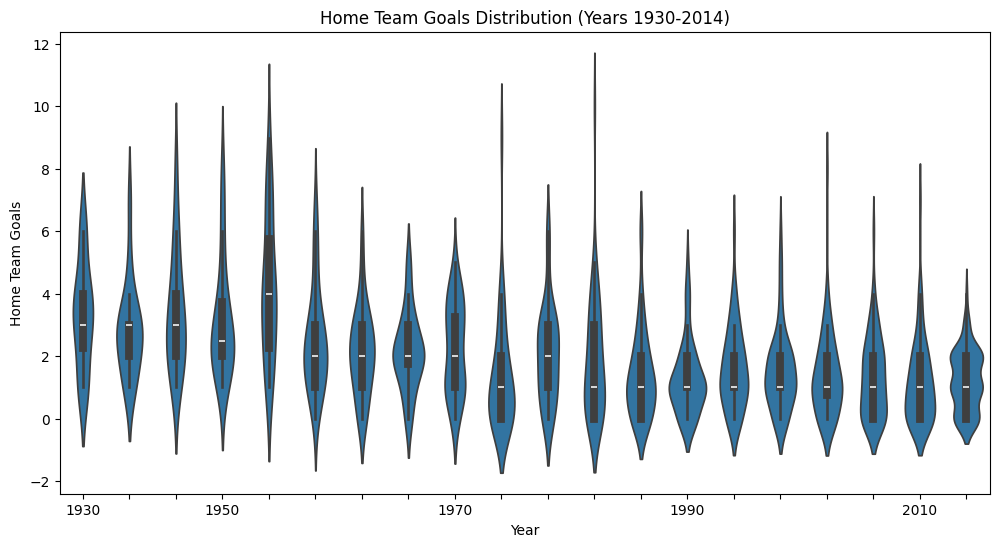

In [5]:
# Draw violin plots to summarize Home Team Goals distributions for each year by using seaborn.

plt.figure(figsize=(12,6))

ax = sns.violinplot(data=df, x="Year", y="Home Team Goals")

#Labels for years ending in 0 taken from logic in the QQ Proportions Demo Notebook
years=sorted(df['Year'].unique())
labels = [x if x % 10 == 0 else None for x in years]

ax.set_xticklabels(labels)

#Adding labels and title
plt.xlabel("Year")
plt.ylabel("Home Team Goals")
plt.title("Home Team Goals Distribution (Years 1930-2014)")

**Q4** Please install joypy. Then visualize distributions for Home Team Goals and Away Team Goals' for each year. Once you visualize, please add  plt.style.use('seaborn-white') to see how colors change in your second run. Please also add the legend which you can find from the function prototype.



In [6]:
!pip install joypy

Text(0.5, 1.0, 'Year')

<Figure size 1000x1000 with 0 Axes>

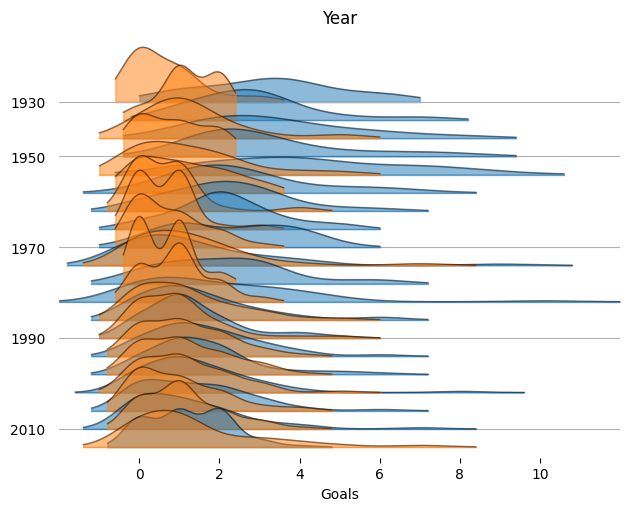

In [8]:
import joypy as jp

plt.figure(figsize=(10,10))

years=sorted(df['Year'].unique())
labels = [y if y % 10 == 0 else None for y in years]

fig, axes = jp.joyplot(
    data=df,
    column=['Home Team Goals', 'Away Team Goals'],
    by = 'Year',
    labels = labels,
    range_style = 'own',
    grid = "y",
    linewidth = 1,
    alpha = 0.5
)

plt.xlabel("Goals")
plt.title("Year")

In [9]:
#returns a list of Matplotlib styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Figure size 1000x1000 with 0 Axes>

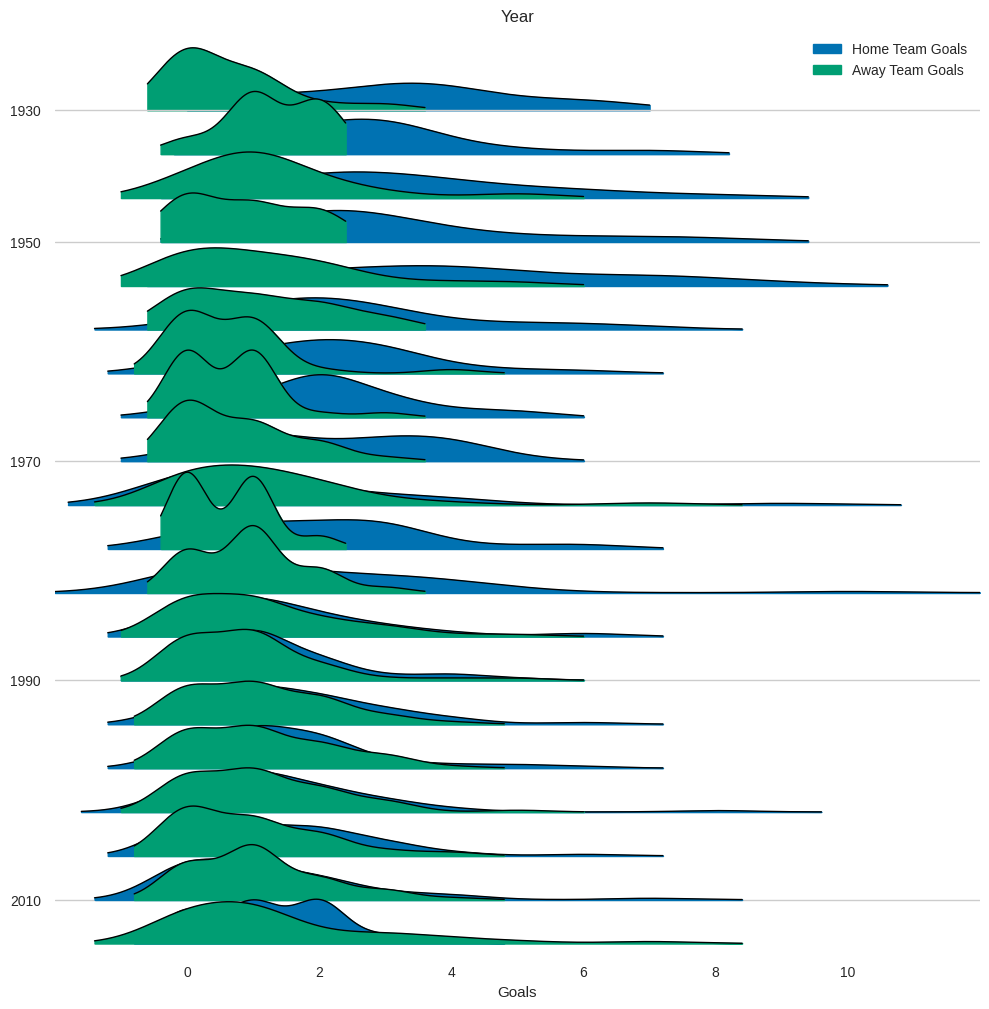

In [18]:
plt.style.use('seaborn-v0_8-white')
plt.figure(figsize=(10,10))

years=sorted(df['Year'].unique())
labels = [y if y % 10 == 0 else None for y in years]

fig, axes = jp.joyplot(data=df, by="Year", column=["Home Team Goals", "Away Team Goals"], labels=labels, range_style='own',
                          grid="y", linewidth=1, legend=True, figsize=(10,10),
                          title="Ridge Plot with Home Team Goals and Away Team Goals Using Seaborn-White"
                          )

plt.xlabel("Goals")
plt.title("Year")
plt.legend(['Home Team Goals', 'Away Team Goals'])

**Q5** Please use groupby function on Home Team Initials to see the sum of Home Team Goals which can be saved to another data frame by adding .reset_index() end the end of your line.

Then use your new data frame to visualize those total Home Team Goals for your top 5 countries with a bar plot (You can use Home Team Initials). You can use use df.sort_values() function on your data frame by tweaking the ascending option.

Notice that your x-axis will be having country initials, and y-axis will show the total number of Home Team Goals.



Home Team Initials
ALG      5
ANG      0
ARG    111
AUS      7
AUT     31
      ... 
URU     62
USA     19
WAL      2
YUG     42
ZAI      0
Name: Home Team Goals, Length: 77, dtype: int64
   Home Team Initials  Home Team Goals
0                 ALG                5
1                 ANG                0
2                 ARG              111
3                 AUS                7
4                 AUT               31
..                ...              ...
72                URU               62
73                USA               19
74                WAL                2
75                YUG               42
76                ZAI                0

[77 rows x 2 columns]
   Home Team Initials  Home Team Goals
8                 BRA              180
2                 ARG              111
25                FRG               99
36                ITA               99
32                HUN               73


Text(0, 0.5, 'Home Team Goals')

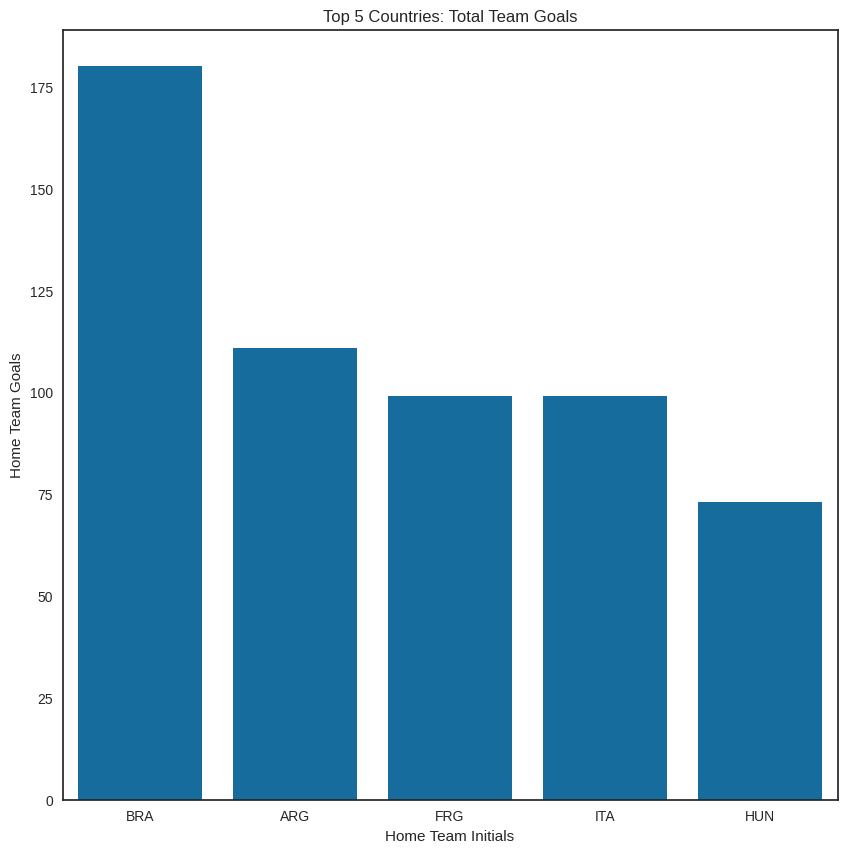

In [29]:
#Using groupby function on Home Team Initials to see the sum of Home Team Goals
group_goals = df.groupby('Home Team Initials')['Home Team Goals'].sum()

print(group_goals)

#Creating a new df with .reset_index() function
df_newgoals = group_goals.reset_index()
print(df_newgoals)

#Sorting Home Team Goals in Descending Order
df_sorted = df_newgoals.sort_values(by = 'Home Team Goals', ascending = False)

#Top 5 Countries
df_topfive = df_sorted.head(5)
print(df_topfive)

#Bar Plot
plt.figure(figsize=(10,10))
sns.barplot(data = df_topfive, x = 'Home Team Initials', y = 'Home Team Goals')

#Labels + Title
plt.title('Top 5 Countries: Total Team Goals')
plt.xlabel('Home Team Initials')
plt.ylabel('Home Team Goals')

**Q6** Please extract the rows for your top 4 countries (Home Team Initials') with the help of the previous question's answer. Then use joyplot again to visualize densities for 'Home Team Goals' and	'Away Team Goals' on the horizantal axis. Notice that your y-axis labels will be your country initials (Home Team Initials'). Make sure that your legend is visible and use 'dark_background' by calling plt.style.use again.



['BRA', 'ARG', 'FRG', 'ITA']
     Year              Datetime                     Stage             Stadium  \
4    1930  15 Jul 1930 - 16:00                    Group 1      Parque Central   
10   1930  19 Jul 1930 - 15:00                    Group 1  Estadio Centenario   
11   1930  20 Jul 1930 - 13:00                    Group 2  Estadio Centenario   
14   1930  22 Jul 1930 - 14:45                    Group 1  Estadio Centenario   
15   1930  26 Jul 1930 - 14:45                Semi-finals  Estadio Centenario   
..    ...                   ...                       ...                 ...   
842  2014  01 Jul 2014 - 13:00                Round of 16  Arena de Sao Paulo   
845  2014  04 Jul 2014 - 17:00             Quarter-finals    Estadio Castelao   
846  2014  05 Jul 2014 - 13:00             Quarter-finals    Estadio Nacional   
848  2014  08 Jul 2014 - 17:00                Semi-finals    Estadio Mineirao   
850  2014  12 Jul 2014 - 17:00   Play-off for third place    Estadio Nacional   

<Figure size 1000x600 with 0 Axes>

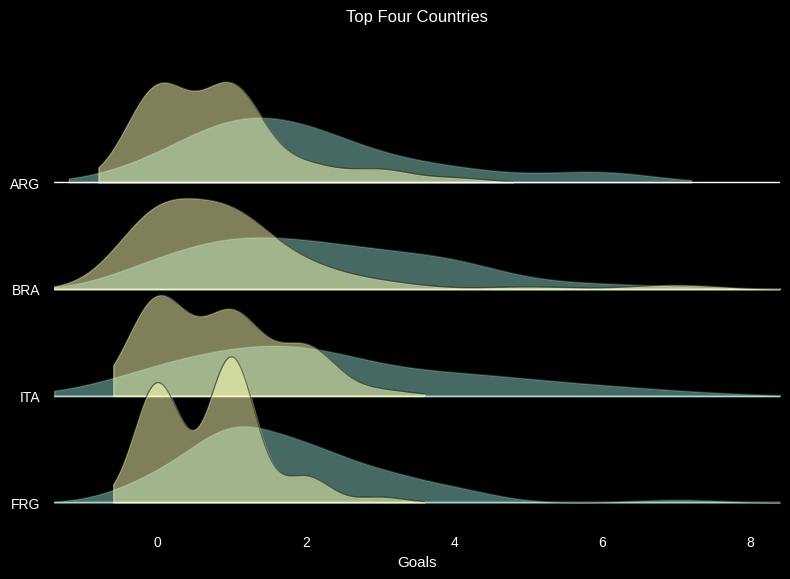

In [40]:
#Getting the top 4 countries from df_topfive from Q5
top_four = df_topfive['Home Team Initials'].head(4).tolist()
print(top_four)

#Style
plt.style.use('dark_background')

#Gets the information from the original df for df_topfour
df_topfour = df[df['Home Team Initials'].isin(top_four)]
print(df_topfour)

plt.figure(figsize = (10,6))

#Labels
countries = df_topfour['Home Team Initials'].unique()
labels = list(countries)

#Plot of Home Team Goals
fig, axes = jp.joyplot(data=df_topfour, column = ['Home Team Goals', 'Away Team Goals'], by="Home Team Initials", labels = labels, range_style='own',
                          grid="y", linewidth=1, alpha = .5)

plt.xlabel("Goals")
plt.title('Top Four Countries')
plt.legend(['Home Team Goals', 'Away Team Goals'])

In [41]:
print(plt.style.available)
#plt.style.use('dark_background')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


**Q7** Please install seaborn_qqplot as shown below. Then draw a qqplot to compare probability distributions of Home Team Goals and Away Team Goals. Please comment on your finding. Do you think their distributions agree with each other? Please justify your answer by explaining the figure you obtained.

In [43]:
!pip install seaborn_qqplot

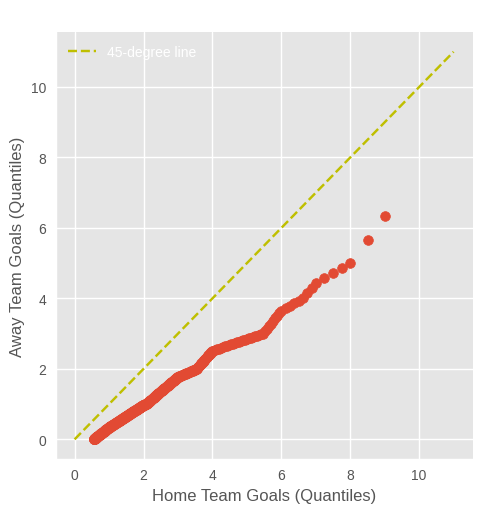

In [49]:
from seaborn_qqplot import pplot #seaborn-qqplot is a seaborn extension adding qqplots.
plt.style.use('ggplot') #this is to change the color theme.

pplot(data = df, x = 'Home Team Goals', y = 'Away Team Goals', kind = 'qq', height = 5, aspect = 1)

#Adding a line to compare from (0,0) to (11,11)
max_goals = max(df['Home Team Goals'].max(), df['Away Team Goals'].max()) + 1
plt.plot([0, max_goals], [0, max_goals], 'y--', label='45-degree line')


plt.title("Home Team Goals vs. Away Team Goals")
plt.xlabel("Home Team Goals (Quantiles)")
plt.ylabel("Away Team Goals (Quantiles)")
plt.legend()

#Interpretation and Justification
#Home Team Goals along the x-axis grow faster than Away Team Goals along the y-axis
# The 45 degree dotted yellow line I added as a visual aid and comparison against a truly linear progression
# The lower end which corresponds to 0-2 goals are closer to the 45 degree line, indicating that distributions between Home and Away are similar for low-scoring games
# There is a significant difference for higher quantiles. Home Team Goals nearly reach 10, but Away Team goals scarcely surpass 6.
# In conclusion, home teams generally have high scoring games more often while away teams do not ever seem to hit 7 goals.
# The distributions do not agree because Home Team Goals have a higher mean and median than Away Team Goals.